<a href="https://colab.research.google.com/github/dekoska/machine-learning-bootcamp/blob/main/supervised/03_classification/01_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

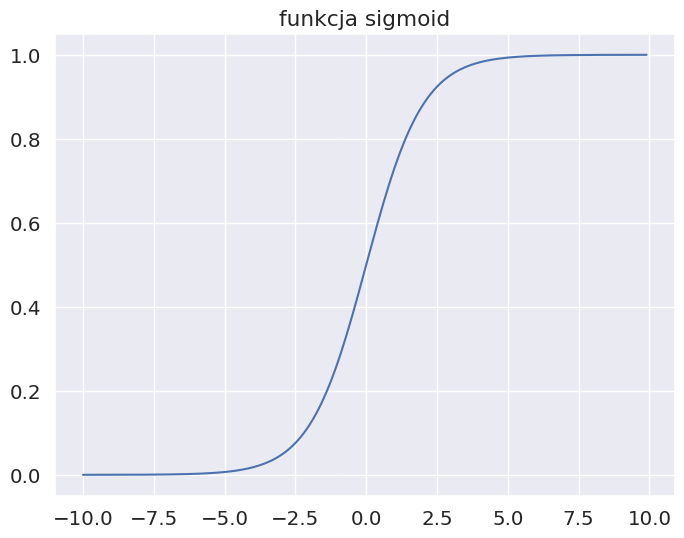

In [4]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

X = np.arange(-10, 10, 0.1)
Y = sigmoid(X)

plt.figure(figsize=(8,6))
plt.plot(X, Y)
plt.title("funkcja sigmoid")
plt.show()

In [6]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
print(raw_data.keys())
print(raw_data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

In [8]:
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data, target)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
scaler.mean_

array([14.12, 19.20, 91.89, 654.92, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.40, 1.21, 2.86, 40.13, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.21, 25.51, 106.89, 873.72, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08])

In [11]:
scaler.scale_

array([3.53, 4.23, 24.28, 356.02, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.29, 0.54, 2.09, 47.97, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.78, 6.02, 33.04, 564.58, 0.02, 0.15, 0.20, 0.06, 0.06, 0.02])

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred  = log_reg.predict(X_test)
y_pred[:30]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [18]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.12, 0.88],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.96, 0.04],
       [0.42, 0.58],
       [0.00, 1.00],
       [0.05, 0.95],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.86, 0.14],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.08, 0.92],
       [0.01, 0.99],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.01, 0.99],
       [0.00, 1.00],
       [1.00, 0.00]])

accuracy: 0.9790209790209791


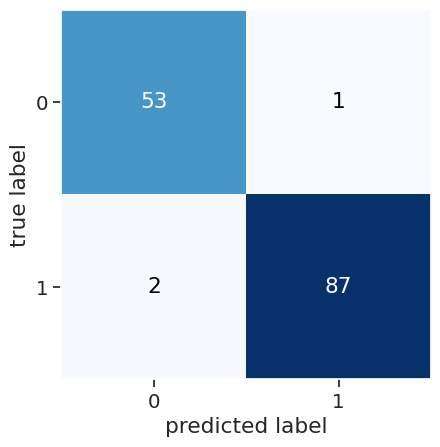

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')

In [20]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

